In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
DF = pd.read_csv('Columbia_CLI.csv')

In [8]:
DF.head()

,id,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
DROP = ['inq_last_12m', 'total_bal_il', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'open_acc_6m', 'il_util', 'all_util', 'total_cu_tl', 'inq_fi', 'open_rv_12m', 'total_rev_hi_lim', 'open_rv_24m', 'max_bal_bc', 'desc', 'emp_title','addr_state','zip_code','earliest_cr_line']

In [11]:
DF.drop(list(DROP), axis = 1, inplace = True)

In [36]:
drop2 = ['application_type', 'policy_code']
DF.drop(list(drop2), axis = 1, inplace = True)

ValueError: min() arg is an empty sequence

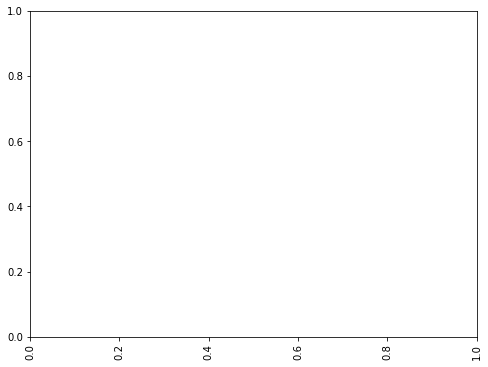

In [50]:
#Looking at the missing data

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(DF)

In [46]:
DF['mths_since_last_record'].fillna(DF['mths_since_last_record'].mode()[0], inplace = True)
DF['next_pymnt_d'].fillna(DF['next_pymnt_d'].mode()[0], inplace = True)
DF['mths_since_last_delinq'].fillna(DF['mths_since_last_delinq'].mode()[0], inplace = True)
DF['emp_length'].fillna(DF['emp_length'].mode()[0], inplace = True)
DF['last_pymnt_d'].fillna(DF['last_pymnt_d'].mode()[0], inplace = True)

In [52]:
DF.shape

(999, 42)

In [47]:
pd.options.display.max_columns= None

In [48]:
DF.head()

,id,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,27.65,0,1,38.0,83.0,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,16-Feb,16-Jan,0,0
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,1.00,0,5,38.0,83.0,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,16-Feb,13-Sep,0,0
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,8.72,0,2,38.0,83.0,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,16-Feb,16-Jan,0,0
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,20.00,0,1,35.0,83.0,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,16-Feb,15-Jan,0,0
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,17.94,0,0,38.0,83.0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16-Jan,67.79,16-Feb,16-Jan,0,0


In [81]:
all_data = DF
import re
                                                                            
traindf=DF

traindf = pd.get_dummies(traindf, columns = ["term","grade","sub_grade","initial_list_status","emp_length","home_ownership","verification_status","pymnt_plan","purpose","title", 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'],
prefix=["term","grade","sub_grade","emp_length","home_ownership","initial_list_status","verification_status","pymnt_plan","purpose","title", 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'])


In [82]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

In [83]:
all_features = traindf.drop("loan_status",axis=1)
Targeted_feature = traindf["loan_status"]


# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)

In [84]:
X_train.head()

,id,member_id,CLI,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,emp_length_f,home_ownership_1 year,home_ownership_10+ years,home_ownership_2 years,home_ownership_3 years,home_ownership_4 years,home_ownership_5 years,home_ownership_6 years,home_ownership_7 years,home_ownership_8 years,home_ownership_9 years,home_ownership_< 1 year,initial_list_status_MORTGAGE,initial_list_status_OWN,initial_list_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_ Bill pay of,title_ Debt Consolidation for recent Grad.,title_12-7-11 DEBT AND MEDICAL CONSOLIDATE,title_12-Apr,title_12/2011 loan,title_1941 Chevrolet 3100,title_2011 CC Pay-Off,title_2011 Consolidate Loan,title_2011 Debt Consolidation,title_2011 loan,title_2012 New Beginnings,title_2012 Pay Off,title_2400,title_36 Months to Freedom,title_5 Years to Financial Freedom,"title_70%Attached room,30%cc-loanconsolidation",title_A fresh new year with less CC debts,title_Advertising for growing business,title_After Great Experience I am Back Again,title_Alabama Consolidation Loan,title_Amex,title_Auto Loan,"title_Avoid CCs,Various Seasonal and Other Exp",title_Bank of America Pay-Off Loan,title_Bathroom Repairs,title_Bill Consolidation,title_Bill Consolidation -Debt free by 2015!!!,title_Bill Pay off,title_Bill Payoff,title_Bill loan,title_Bills,title_Boat Loan,title_Breathing Room,title_Breathing room,title_Brown Eyes Loan,title_Building my credit history.,title_Business,title_Business Loan,title_Business loan,title_Buying A Modest Home + Small Business,title_Bye Bye Credit Cards,title_Bye-bye high interest rates!,title_C/C Consolidation Loan,title_CC Assist,title_CC Consolidate - Home Improve,title_CC Consolidation,title_CC Debt,title_CC Pay Off,title_CC Payoff,title_CC Refi Loan,title_CC Refinance,title_CC refi,title_CC/Car,title_CCConsolidation,title_CCPayoff,title_CCdebt,title_CLEAR UP,title_CONSOLIDATION,title_CREDIT CARD CONSOLIDATION,title_CREDIT CARD PAYOFF,title_Capitol One Refinance,title_Car,title_Car Downpayment,title_Car Loan,title_Car loan,title_Car loan and pay off my family,title_Card Consolidation,title_Card Refi,title_Card Refinance,title_Card's,title_Cards,title_Chase,title_Citi Card,title_Citicard,title_Clean Up,title_CleanUpCC,title_Coledon's Club Loan,title_Computer,title_Computer Equipment,title_Condo,title_Consol,title_Consolidate,title_Consolidate CCs and pay back family,title_Consolidate Closed Credit Accounts,title_Consolidate Credit Card Debt,title_Consolidate Debt,title_Consolidate me 2011,title_Consolidated,title_Consolidating Big Bank Debt,title_Consolidating Debt from Home Repair,title_Consolidation,title_Consolidation,title_Consolidation Facility,title_Consolidation Loan,title_Consolidation Loan December 2011,title_Consolidation loan,title_Creating More Space,title_Credi Card Payment,title_Credit Card,title_Credit Card Bala

In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699, 744), (300, 744), (699,), (300,))

In [86]:
X_train.head()

,id,member_id,CLI,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,emp_length_f,home_ownership_1 year,home_ownership_10+ years,home_ownership_2 years,home_ownership_3 years,home_ownership_4 years,home_ownership_5 years,home_ownership_6 years,home_ownership_7 years,home_ownership_8 years,home_ownership_9 years,home_ownership_< 1 year,initial_list_status_MORTGAGE,initial_list_status_OWN,initial_list_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_ Bill pay of,title_ Debt Consolidation for recent Grad.,title_12-7-11 DEBT AND MEDICAL CONSOLIDATE,title_12-Apr,title_12/2011 loan,title_1941 Chevrolet 3100,title_2011 CC Pay-Off,title_2011 Consolidate Loan,title_2011 Debt Consolidation,title_2011 loan,title_2012 New Beginnings,title_2012 Pay Off,title_2400,title_36 Months to Freedom,title_5 Years to Financial Freedom,"title_70%Attached room,30%cc-loanconsolidation",title_A fresh new year with less CC debts,title_Advertising for growing business,title_After Great Experience I am Back Again,title_Alabama Consolidation Loan,title_Amex,title_Auto Loan,"title_Avoid CCs,Various Seasonal and Other Exp",title_Bank of America Pay-Off Loan,title_Bathroom Repairs,title_Bill Consolidation,title_Bill Consolidation -Debt free by 2015!!!,title_Bill Pay off,title_Bill Payoff,title_Bill loan,title_Bills,title_Boat Loan,title_Breathing Room,title_Breathing room,title_Brown Eyes Loan,title_Building my credit history.,title_Business,title_Business Loan,title_Business loan,title_Buying A Modest Home + Small Business,title_Bye Bye Credit Cards,title_Bye-bye high interest rates!,title_C/C Consolidation Loan,title_CC Assist,title_CC Consolidate - Home Improve,title_CC Consolidation,title_CC Debt,title_CC Pay Off,title_CC Payoff,title_CC Refi Loan,title_CC Refinance,title_CC refi,title_CC/Car,title_CCConsolidation,title_CCPayoff,title_CCdebt,title_CLEAR UP,title_CONSOLIDATION,title_CREDIT CARD CONSOLIDATION,title_CREDIT CARD PAYOFF,title_Capitol One Refinance,title_Car,title_Car Downpayment,title_Car Loan,title_Car loan,title_Car loan and pay off my family,title_Card Consolidation,title_Card Refi,title_Card Refinance,title_Card's,title_Cards,title_Chase,title_Citi Card,title_Citicard,title_Clean Up,title_CleanUpCC,title_Coledon's Club Loan,title_Computer,title_Computer Equipment,title_Condo,title_Consol,title_Consolidate,title_Consolidate CCs and pay back family,title_Consolidate Closed Credit Accounts,title_Consolidate Credit Card Debt,title_Consolidate Debt,title_Consolidate me 2011,title_Consolidated,title_Consolidating Big Bank Debt,title_Consolidating Debt from Home Repair,title_Consolidation,title_Consolidation,title_Consolidation Facility,title_Consolidation Loan,title_Consolidation Loan December 2011,title_Consolidation loan,title_Creating More Space,title_Credi Card Payment,title_Credit Card,title_Credit Card Bala

In [138]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()

In [140]:
x_train_set = scaler.fit_transform(X_train)
x_test_set = scaler.transform(X_test)

In [141]:
classifier = RidgeClassifier(alpha = 10, random_state = 42)

In [142]:
classifier.fit(x_train_set, y_train)

RidgeClassifier(alpha=10, random_state=42)

In [143]:
y_predict = classifier.predict(x_test_set)

In [144]:
classifier.score(x_test_set, y_test)

0.88

In [145]:
print(metrics.classification_report(y_predict, y_test))

              precision    recall  f1-score   support

 Charged Off       0.60      0.74      0.67        47
     Current       1.00      0.96      0.98        26
     Default       0.00      0.00      0.00         0
  Fully Paid       0.94      0.90      0.92       227

    accuracy                           0.88       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.90      0.88      0.89       300

